In this assignment will be using CIFR10 Dataset.

---


*   The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes.

*   The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.




In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

**Sample images from CIFAR-10 dataset**

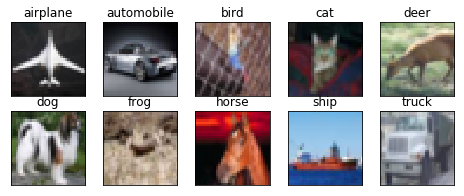

In [13]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

**Utility functions which will help in plotting training and test auuracy vs epochs**

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

**Below code segment is to get the base accuracy which can be used as base line auuracy and later in the assignment will follow the better approaches to improve training accuracy than this base accuracy.**

In [17]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_11 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_12 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 96)        41568     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 11s 28ms/step - loss: 1.8428 - acc: 0.2977 - val_loss: 1.4469 - val_acc: 0.4755
Epoch 2/100
390/390 [==============================] - 9s 24ms/step - loss: 1.3138 - acc: 0.5261 - val_loss: 1.1314 - val_acc: 0.5912
Epoch 3/100
390/390 [==============================] - 9s 24ms/step - loss: 1.1035 - acc: 0.6111 - val_loss: 0.9503 - val_acc: 0.6618
Epoch 4/100
390/390 [==============================] - 9s 24ms/step - loss: 0.9724 - acc: 0.6589 - val_loss: 0.8849 - val_acc: 0.6889
Epoch 5/100
390/390 [==============================] - 9s 24ms/step - loss: 0.8735 - acc: 0.6954 - val_loss: 0.7744 - val_acc: 0.7341
Epoch 6/100
390/390 [==============================] - 9s 24ms/step - loss: 0.8120 - acc: 0.7198 - val_loss: 0.7433 - val_acc: 0.7438
Epoch 7/100
390/390 [==============================] - 9s 24ms/step - loss: 0.7555 - acc: 0.7388 - val_loss: 0.7035 - val_acc: 0.7607
Epoch 8/100
390/390 [==============================] - 9s 23m

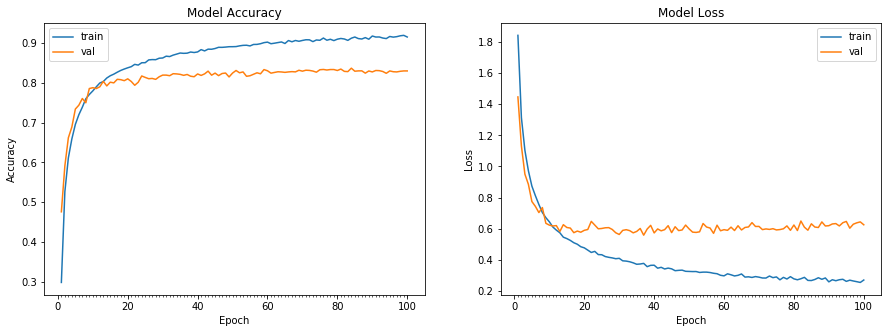

Accuracy on test data is: 83.01


In [19]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))


From the above base network,  will make few basic changes to improve training accuracy in less number of parameters.


*   Remove Dense layers
*   Use 1x1 change channel size.
*   Use Batch normalization
*   Add dropouts in right location.
*   Also use Relu after Batch norm.




In [20]:
# Changes done on above base model to improve accuracy
from keras import regularizers
model = Sequential()
weight_decay = 1e-4

model.add(Convolution2D(48, 3, 3, border_mode='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(32, 32, 3))) #32
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(96, 3, 3, border_mode='same', kernel_regularizer=regularizers.l2(weight_decay))) #32
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(192, 3, 3, border_mode='same', kernel_regularizer=regularizers.l2(weight_decay))) #32
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.25))
model.add(Convolution2D(10, 1, 1, activation='relu')) #32

model.add(MaxPooling2D(pool_size=(2, 2))) #16

model.add(Convolution2D(48, 3, 3, border_mode='same', kernel_regularizer=regularizers.l2(weight_decay))) #16
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(96, 3, 3, border_mode='same', kernel_regularizer=regularizers.l2(weight_decay))) #16
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same', kernel_regularizer=regularizers.l2(weight_decay))) #16
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.25))
model.add(Convolution2D(10, 1, 1, activation='relu')) #16

model.add(MaxPooling2D(pool_size=(2, 2))) #8


model.add(Convolution2D(48, 3, 3, border_mode='same', kernel_regularizer=regularizers.l2(weight_decay))) #8
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(96, 3, 3, border_mode='same', kernel_regularizer=regularizers.l2(weight_decay))) #8
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same', kernel_regularizer=regularizers.l2(weight_decay))) #8
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 1, 1, activation='relu')) #8

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 4, 4))

#model.add(BatchNormalization())



model.add(Flatten())
model.add(Activation('softmax'))

model.summary()
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), kernel_regularizer=<keras.re

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 96)        41568     
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 96)        384       
_________________________________________________________________
activation_20 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 192)       166080    
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


**Below we can see training auuracy improved by 4% by using the above mentioned improvements.**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=97, epochs=100)`
  app.launch_new_instance()


Epoch 1/100
97/97 [==============================] - 36s 369ms/step - loss: 0.6528 - acc: 0.8397 - val_loss: 4.7838 - val_acc: 0.3814
Epoch 2/100
97/97 [==============================] - 35s 364ms/step - loss: 0.5218 - acc: 0.8872 - val_loss: 1.0916 - val_acc: 0.7428
Epoch 3/100
97/97 [==============================] - 35s 363ms/step - loss: 0.4304 - acc: 0.9187 - val_loss: 0.9804 - val_acc: 0.7716
Epoch 4/100
97/97 [==============================] - 35s 363ms/step - loss: 0.3771 - acc: 0.9350 - val_loss: 0.8660 - val_acc: 0.8063
Epoch 5/100
97/97 [==============================] - 35s 364ms/step - loss: 0.3425 - acc: 0.9463 - val_loss: 0.7928 - val_acc: 0.8239
Epoch 6/100
97/97 [==============================] - 35s 362ms/step - loss: 0.3240 - acc: 0.9528 - val_loss: 1.0450 - val_acc: 0.7745
Epoch 7/100
97/97 [==============================] - 35s 363ms/step - loss: 0.2931 - acc: 0.9627 - val_loss: 0.8834 - val_acc: 0.8184
Epoch 8/100
97/97 [==============================] - 35s 364ms

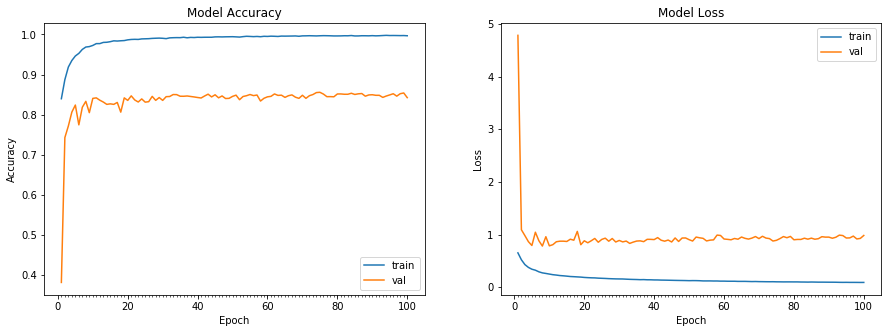

Accuracy on test data is: 84.24


In [22]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 512),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels),callbacks=[LearningRateScheduler(scheduler)], verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [25]:
print("Best base training accuracy :     0.9196 and Best base validation accuracy : 0.8370")
print("Best improved training accuracy : 0.9977 and Best improved validation accuracy : 0.8557")

Best base training accuracy :     0.9196 and Best base validation accuracy : 0.8370
Best improved training accuracy : 0.9977 and Best improved validation accuracy : 0.8557
